In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns
import networkx as nx
import ast
import scipy
from pyvis.network import Network
import community as community_louvain
from scipy import stats
from tqdm.auto import tqdm

# PREPARO DOS DADOS

In [ ]:
df = pd.read_excel('dados_brutos.xlsx')

In [ ]:
orgs = df['organization_id']
users = df['user']
org_u = set(orgs)
dic_userPorOrg = {}
for i,org in enumerate(org_u):
    df_aux = df.loc[(df["organization_id"] == org),:]
    user_aux = df_aux["user"]
    dic_userPorOrg[org] = len(set(user_aux))


In [ ]:
organizations = []
n_users = []
for k,v in dic_userPorOrg.items():
    organizations.append(k)
    n_users.append(v)

df_userPorOrg = pd.DataFrame({
    'organization_id': organizations,
    'N_users': n_users
})

df_userPorOrg = df_userPorOrg.sort_values(ascending=False, by='N_users').reset_index(drop=True)

In [ ]:
dic_pathPorOrg = {}
paths_list_t = []
orgs = df_userPorOrg["organization_id"]

for org in orgs:
    path_aux = df.loc[(df["organization_id"] == org),(["path_actions"])]
    paths_list_u = []
    lista = [ast.literal_eval(paths[0]) for paths in path_aux.values]
    paths_list_u.extend((set(lista[0]))) #extend adiciona cada elemento da lista em paths_list
    paths_list_t.extend((lista[0])) #extend adiciona cada elemento da lista em paths_list_u
    dic_pathPorOrg[org] = (set(paths_list_u))

df_paths = pd.DataFrame()
df_paths['Count'] = pd.Series(paths_list_t).value_counts().values
df_paths['Actions'] = pd.Series(paths_list_t).value_counts().keys()

In [ ]:
action_d = {}
novo_path_list = [0]*len(paths_list_t)
cont = 0
for i,path in enumerate(paths_list_t):
    if path not in action_d.keys():
        action_d[path] = cont
        cont += 1

for i,path in enumerate(paths_list_t):
    novo_path_list[i] = action_d[path]

# ANÁLISE EXPLORATÓRIA

In [ ]:
mean = np.mean(novo_path_list)
median = np.median(novo_path_list)
mode = stats.mode(novo_path_list)
dp = np.std(novo_path_list)
print(f'Mean: {mean}, median: {median}, mode: {mode}, dp: {dp}')

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(df_paths['Actions'], df_paths['Count'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Bar')

plt.subplot(1,3,2)
plt.hist(paths_list_t, edgecolor='black', linewidth=1.2, alpha=0.7, density=True)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Hist')

plt.subplot(1,3,3)
plt.boxplot(df_paths['Count'])
plt.title('Contagem Actions - Box')
plt.show()

In [ ]:
organizations2 = []
paths = []
for k,v in dic_pathPorOrg.items():
    organizations2.append(k)
    paths.append(v)

df_pathPorOrg = pd.DataFrame({
    'organization_id': organizations2,
    'Paths': paths
})

In [ ]:
df_pathPorOrg.head(20)

In [ ]:
x = np.linspace(0,30,1001)
fx = (stats.norm.pdf(x, loc=mean, scale=dp))

In [ ]:
plt.hist(novo_path_list, density=True)
plt.plot(x, fx, color='red')
plt.show()

In [55]:
testando = df['path_actions']
actions = pd.DataFrame({ 'from':[], 'to':[], 'value':[]})
from_ = list(actions['from'])
to_ = list(actions['to'])
value_ = []
counts = {}
saidas_totais = {}

for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]

            from_.append(e)
            to_.append(e_1)

            if (e,e_1) not in counts.keys():
                counts[(e,e_1)] = 1
            else:
                counts[(e,e_1)] += 1

            if e not in saidas_totais.keys():
                saidas_totais[e] = 1
            else:
                saidas_totais[e] += 1
actions['from'] = from_
actions['to'] = to_


for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]
            value_.append(counts[(e, e_1)])
actions['value'] = value_


In [71]:
min_value = actions['value'].min()
max_value = actions['value'].max()

actions['normalized_value'] = ((actions['value'] - min_value) / (max_value - min_value)) * 99 + 1
actions['normalized_value'] = actions['normalized_value'].round(0).astype(int)

In [72]:
actions

,from,to,value,normalized_value
0,home-hall,acessar meus desafios-hall,1415,31
1,acessar meus desafios-hall,handleViewDesafioSRG-hall,533,12
2,handleViewDesafioSRG-hall,home-hall,157,4
3,home-hall,acessar conteúdos em vídeo-lxp,1441,31
4,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,1639,36
...,...,...,...,...
33714,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,1639,36
33715,click em trilhas-lxp,home-hall,330,8
33716,home-hall,acessar conteúdos em vídeo-lxp,1441,31
33717,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,1639,36


In [73]:
G = nx.from_pandas_edgelist(actions[0:500],
                            source="from",
                            target="to",
                            edge_attr="normalized_value", #tamanhos distintos do edge
                            create_using= nx.Graph())

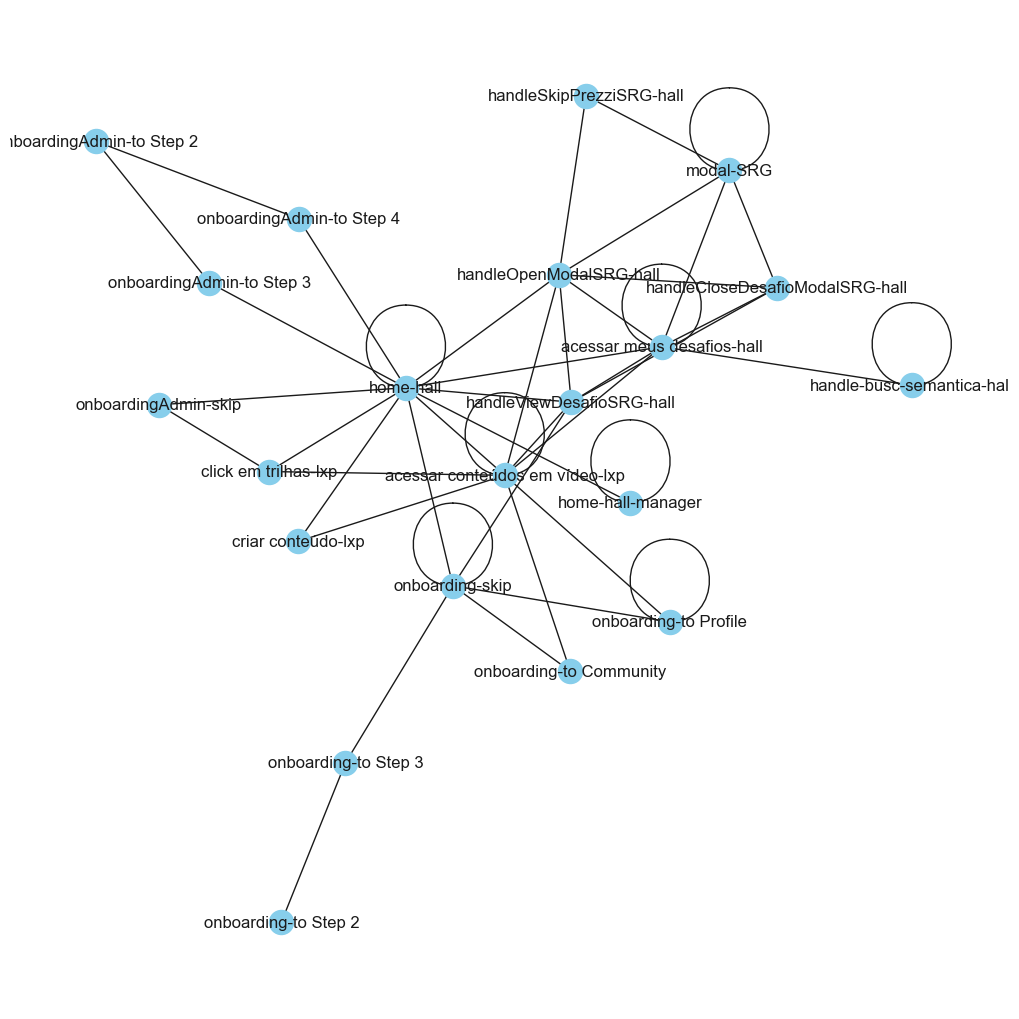

In [74]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos, arrows=True)
plt.show()

In [75]:
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree) #n de conexões que ele fez, tamanho e cor estão relacionados

nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
# net.show("Markov.html")

### Medidas de centralidade -> Basicamente são maneiras de avaliar a importância de nodes em uma rede, usarei a 'degree centrality' que mede o grau de importância de um node de acordo com o numero de conexões que ele faz

<AxesSubplot:>

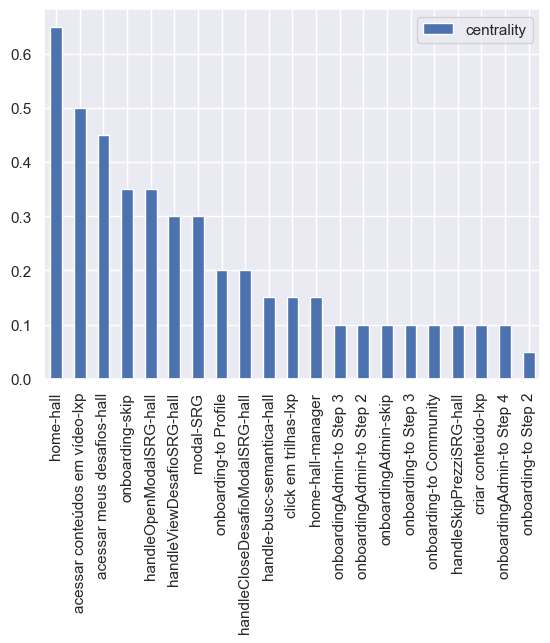

In [76]:
degree_dict = nx.degree_centrality(G)

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index',columns=['centrality'])

degree_df.sort_values('centrality', ascending=False).plot(kind='bar')

In [77]:
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
com_net.from_nx(G)

# Normalize degree centrality values for color mapping
min_degree = min(degree_dict.values())
max_degree = max(degree_dict.values())
norm = cm.colors.Normalize(vmin=min_degree, vmax=max_degree)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)

i = 0
# Set node colors based on degree centrality
for node, degree in degree_dict.items():
    color = cm.colors.rgb2hex(mapper.to_rgba(degree))
    com_net.nodes[i]['color'] = color
    com_net.nodes[i]['font']['color'] = color
    i += 1

com_net.show("Markov_communities.html")

Markov_communities.html


In [ ]:
# plt.figure(figsize=(20,15))
# G = nx.DiGraph(directed=True)
# # G.add_edges_from([actions[0:500], 'from', 'to'])
# h = nx.from_pandas_edgelist(actions[0:500], 'from', 'to')
# G.add_nodes_from(h.nodes)
# G.add_edges_from(h.edges)
# pos = nx.random_layout(G)

# nx.draw(G, pos, with_labels=True, edge_color='lightGreen', node_size=120, cmap=plt.cm.Blues, width=1, arrows=True) #add cores e frequencia
# plt.show()


In [ ]:
# # libraries
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt
 
# # Build a dataframe with your connections
# df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})
 
# # Build your graph
# G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# # Custom the nodes:
# nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)

# CRIANDO MATRIX DE TRANSIÇÃO

In [ ]:
total = sum(counts.values())
counts_freq = counts
for k,v in counts_freq.items():
    counts_freq[k] = v/saidas_totais[k[0]]

In [ ]:
matrix = pd.DataFrame()
for k in action_d.keys():
    matrix[k] = 0
    matrix.loc[k] = 0

for k,v in counts_freq.items():
    matrix.loc[k[0], k[1]] = v


In [ ]:
print(matrix.loc['home-hall', 'onboarding-skip']) #linha, coluna

In [ ]:
matrix = matrix.fillna(0)
matrix

In [ ]:
teste = list(matrix.loc['home-hall', :])
sum(teste)

# MONTE CARLO

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## TESTANDO

In [ ]:
medias = []

for i in range(0,500):
    l_aux = random.choices(novo_path_list, k=2000)
    # l_aux = np.random.normal(loc=mean, scale=dp, size=20)
    medias.append(np.mean(l_aux))


mm = np.mean(medias)
upper = np.quantile(medias, 0.975)
lower = np.quantile(medias, 0.025)
print(mm, lower, upper)


In [ ]:
sns.displot(medias)

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.axvline(mm, color='green')
plt.show()



## COMEÇO

In [ ]:
originais = pd.read_excel('caminhos_originais.xlsx')
path_actions = df['path_actions']
contagem = {}
caminhos = originais['caminho']
repetidos = []
i = 0
for caminho in caminhos:
    for path in path_actions:
        if path == caminho:
            if originais['nome_caminho'][i] not in contagem.keys():
                contagem[originais['nome_caminho'][i]] = 1
            else:
                contagem[originais['nome_caminho'][i]] += 1
            repetidos.append(originais['nome_caminho'][i])
    i += 1
originais['contagem'] = contagem.values()

total = originais['contagem'].sum()
originais['contagem'] = originais['contagem']/total
pesos = originais['contagem']

In [ ]:
originais

In [ ]:
sns.set_theme(rc={
    
})
sns.displot(repetidos, height=10, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()


In [ ]:
modes = []

for i in range(0,50000):
    l_aux = random.choices(originais['caminho'], weights=pesos ,k=100)
    # modes.append(stats.mode(l_aux))


# mm = stats.mode(modes)
# upper = np.quantile(modes, 0.975)
# lower = np.quantile(modes, 0.025)
# print(mm)


In [ ]:
sns.displot(l_aux, height=7, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()

In [ ]:
matrix.columns

In [ ]:
matrix_np = matrix.to_numpy()
Po = np.array([0]*33)
Po[0] = 1
home_hall_progresso = []
acessar_desafios_progresso = []
click_trilhas_progresso = []
acessar_conteudos_progresso = []
i = 0
for i in tqdm(range(1000000)):
    home_hall_progresso.append(Po[0])
    acessar_desafios_progresso.append(Po[3])
    click_trilhas_progresso.append(Po[2])
    acessar_conteudos_progresso.append(Po[1])

    Po = np.matmul(Po, matrix_np)

print(sum(Po))
print(Po)

In [ ]:
df_progresso = pd.DataFrame({
    'Steps': np.arange(0,100,1),
    'Home Hall': home_hall_progresso[0:100],
    'Acessar conteudos': acessar_conteudos_progresso[0:100],
    'Clicar trilhas': click_trilhas_progresso[0:100],
    'Acessar desafios': acessar_desafios_progresso[0:100]
})

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_progresso[['Home Hall', 'Acessar conteudos', 'Clicar trilhas', 'Acessar desafios']])
plt.xlabel('Steps')
plt.ylabel('Prob')
plt.title('Prob VS Steps')
plt.show()

In [ ]:
for i in range(0,50000):
    l_aux = random.choices(matrix.columns, weights=Po ,k=500)
    

In [ ]:
plt.hist(l_aux)

In [ ]:
sns.displot(l_aux, height=7, aspect=2, kind='hist', stat='density', kde=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.displot(paths_list_t, kind='hist', height=7, aspect=2, stat='density', kde=True)
plt.xticks(rotation=90)
plt.show()

# PI

In [ ]:
x_list = [np.random.uniform(-1,1) for _ in range(100)]
y_list = [np.random.uniform(-1,1) for _ in range(100)]

In [ ]:
red = []
red_x = []
red_y = []
all_x = []
all_y = []
all_points = []
i = 0
while i < len(x_list):

    if (x_list[i])**2 + (y_list[i])**2 <= 1:
        red_x.append(x_list[i])
        red_y.append(y_list[i])
        red.append((x_list[i], y_list[i]))
        
    all_points.append((x_list[i], y_list[i]))
    all_x.append(x_list[i])
    all_y.append(y_list[i])

    i += 1



In [ ]:
plt.scatter(all_x, all_y, color='blue', alpha=0.2)
plt.scatter(red_x, red_y, color='red')

plt.xlim(-2,2)
plt.ylim(-2,2)

In [ ]:
nRed = len(red_x)
nAll = len(all_x)
pi = 4 * (nRed/nAll)

print(pi)